# Read data

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

df_bank = pd.read_csv('bank.csv', sep=';')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Measures of Central Tendency

## Mean

In [4]:
df_bank.select_dtypes(include='number').mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

## Median

In [5]:
df_bank.select_dtypes(include='number').median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

## Mode

In [6]:
df_bank.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


## Quartiles

In [9]:
df_bank.select_dtypes(include='number').describe().loc[['25%', '50%', '75%']]

,age,balance,day,duration,campaign,pdays,previous
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0


# Measures of Dispersion

## Range

In [11]:
df_bank.select_dtypes(include='number').max() - df_bank.select_dtypes(include='number').min()

age             77
balance     110146
day             30
duration      4918
campaign        62
pdays          872
previous       275
dtype: int64

## Variance

In [12]:
df_bank.select_dtypes(include='number').var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

## Standard Deviation

In [16]:
df_bank.select_dtypes(include='number').std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

## Interquartile Range (IQR)

In [17]:
df_bank.select_dtypes(include='number').quantile(0.75) - df_bank.select_dtypes(include='number').quantile(0.25)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64

# Histogram

In [19]:
df_bank.select_dtypes(include='number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

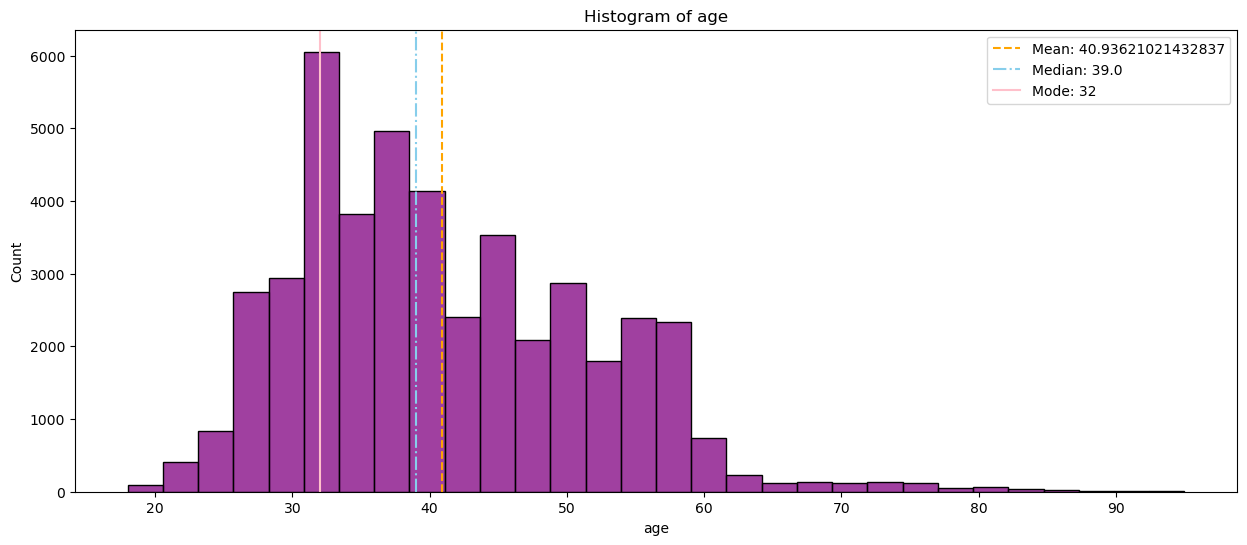

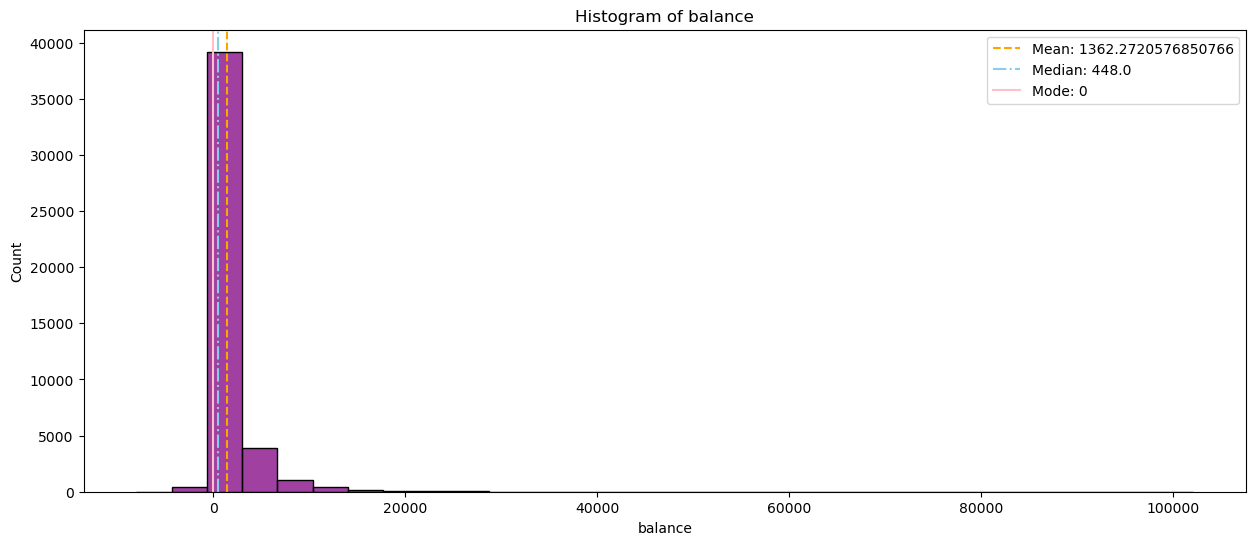

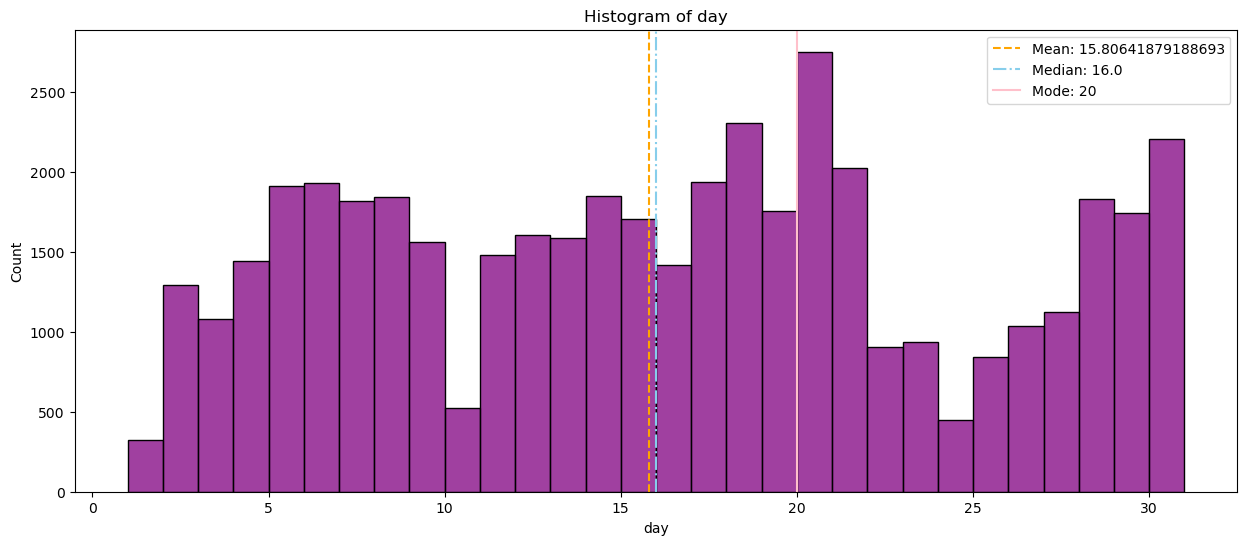

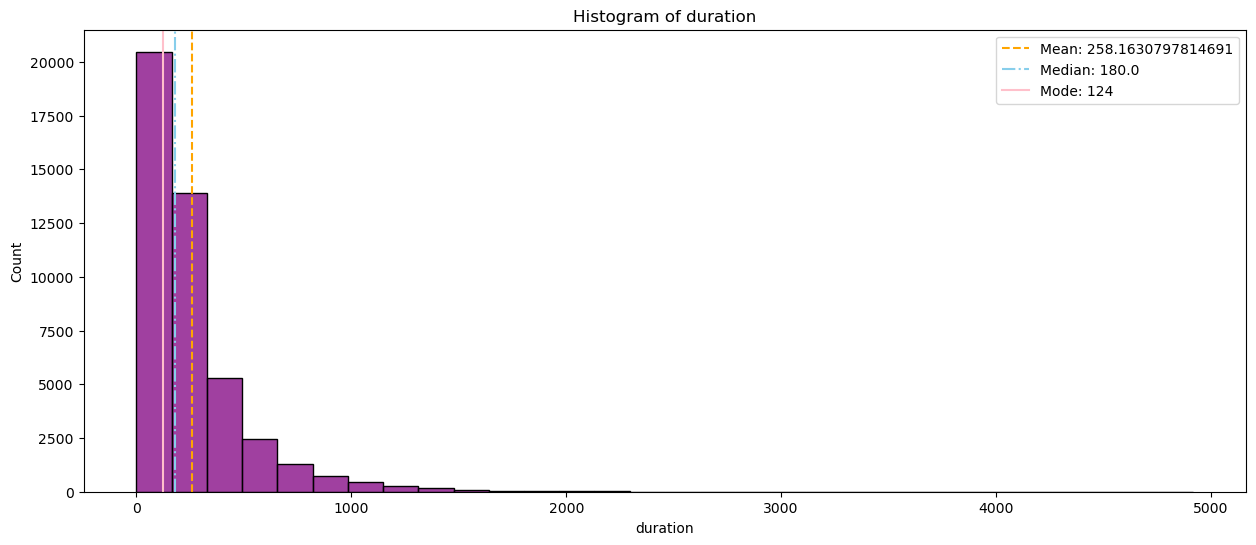

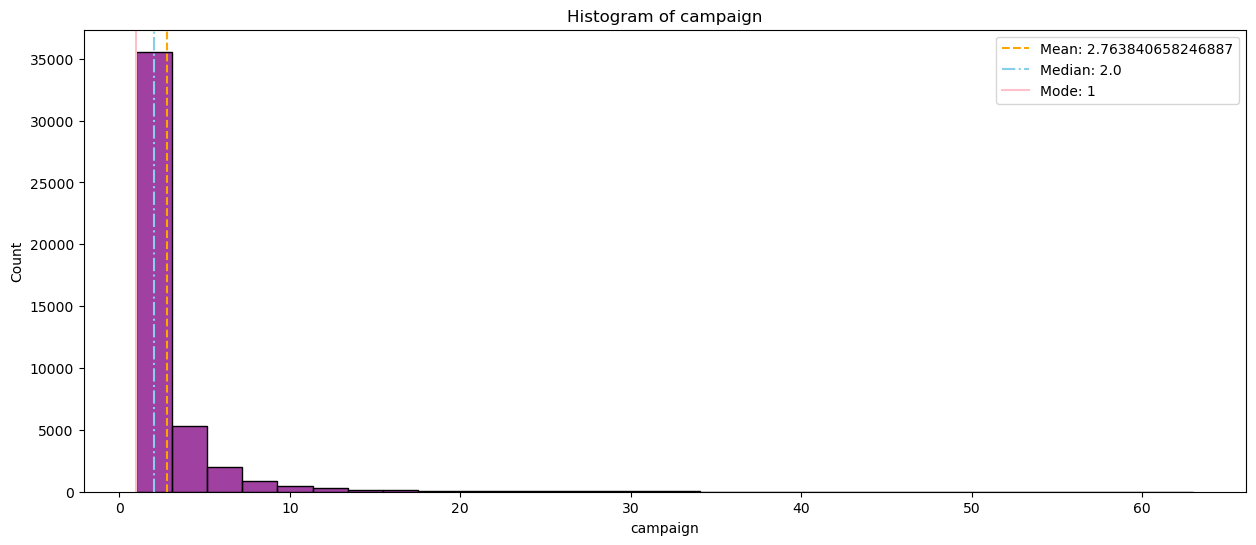

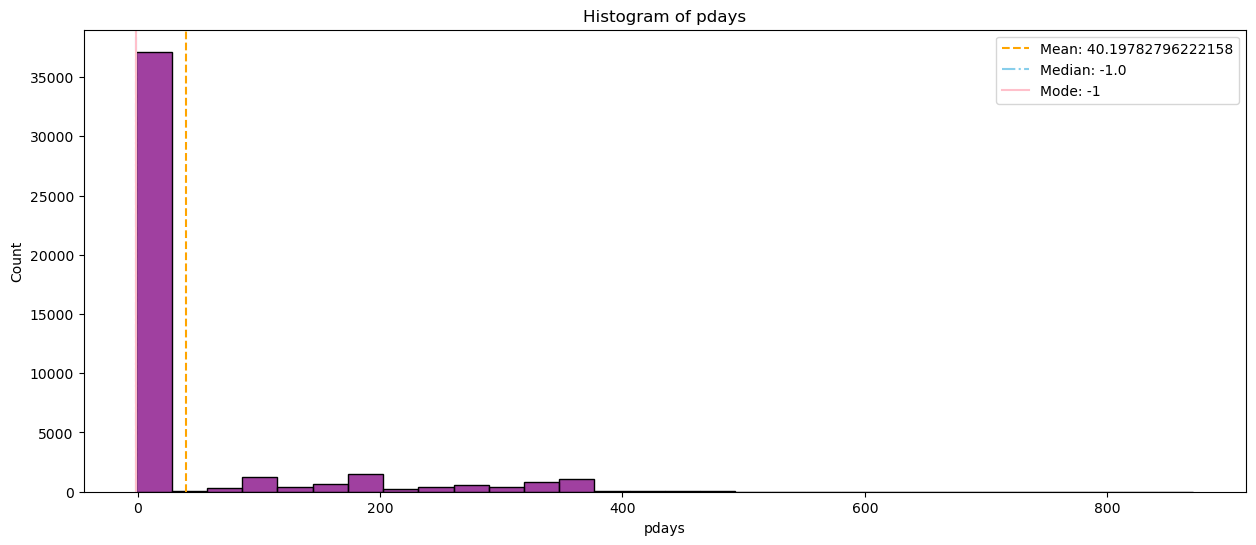

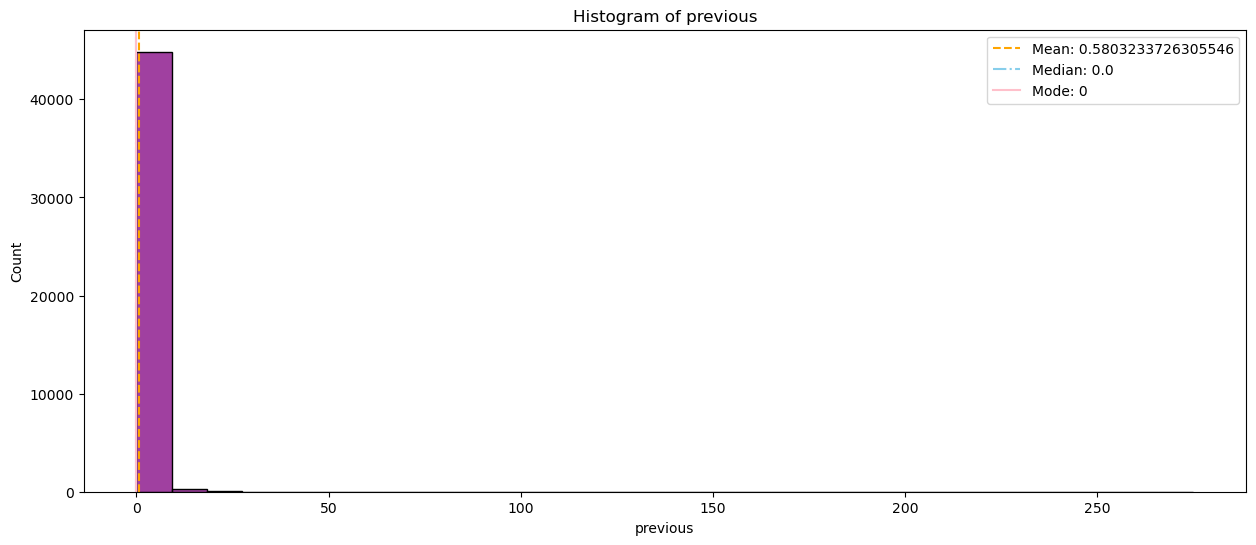

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_bank.select_dtypes(include='number').columns:
    mean = df_bank[col].mean()
    median = df_bank[col].median()
    mode = df_bank[col].mode()[0]

    plt.figure(figsize=(15, 6))
    sns.histplot(df_bank[col], bins=30, color='purple') 

    plt.axvline(mean, color='orange', linestyle='--', label=f'Mean: {mean:}')
    plt.axvline(median, color='skyblue', linestyle='-.', label=f'Median: {median:}')
    plt.axvline(mode, color='pink', linestyle='-', label=f'Mode: {mode:}')
    plt.title(f'Histogram of {col}')
    plt.legend()
    plt.show()